# Задача
С помощью скрипта на python преобразовать исходные данные: 
													
									
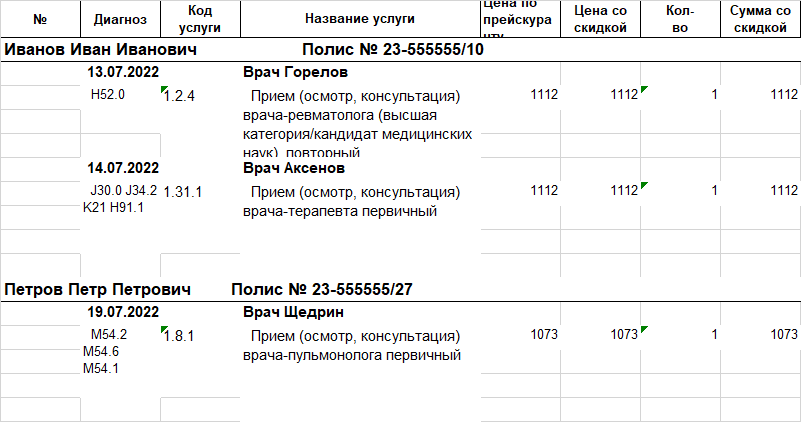

до датафрейма требуемого формата:


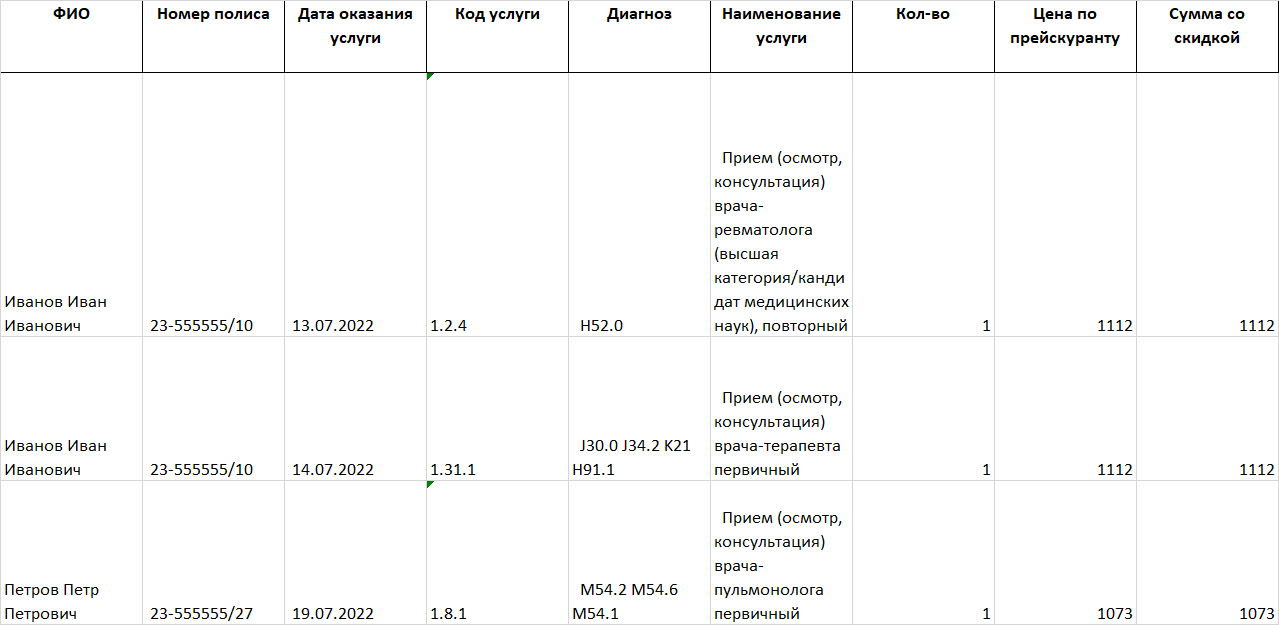

In [230]:
import pandas as pd
import re

def read_and_transform_excel(file_path):
    # Чтение файла Excel
    df = pd.read_excel(file_path)

    # Преобразование объединенных строк
    new_rows = []
    fio = ""
    for index, row in df.iterrows():
        if not pd.isna(row[0]): 
            fio = row[0]  # Значение первой ячейки становится ФИО (и полис, и ним разберемся позже)
        if pd.isna(row[6]): # Дальше ищем дату там, где 6 столбец пустой
            date_match = re.search(r'\d{2}\.\d{2}\.\d{4}', str(row[1]))  
            date = date_match.group(0) if date_match else ""  # Если нашли дату, сохраняем ее, иначе пустая строка
        new_row = [fio, date] + list(row[1:])  # Создаем новую строку с ФИО, датой и значениями из остальных столбцов
        new_rows.append(new_row)

    # Создание нового DataFrame с преобразованными строками
    new_df = pd.DataFrame(new_rows, columns=["ФИО", "Дата оказания услуги"] + list(df.columns[1:]))
    
    # Переименовываем колонки как требуется
    new_df.rename(columns={"Код \nуслуги": "Код услуги", "Название услуги": "Наименование услуги", "Кол-\nво": "Кол-во"}, inplace=True)

    # Упорядочивание столбцов в нужном порядке
    ordered_columns = ["Код услуги", "Диагноз", "Наименование услуги", "Кол-во", "Цена по прейскуранту", "Сумма со скидкой"]
    new_df = new_df[["ФИО", "Дата оказания услуги"] + ordered_columns]
    
    # Преобразуем данные под нужный вид (убираем пропуски, меняем тип данных)
    new_df = new_df.dropna(subset = ["Код услуги", "Диагноз", "Наименование услуги", "Кол-во", "Цена по прейскуранту", "Сумма со скидкой"])
    new_df[["Кол-во", "Цена по прейскуранту", "Сумма со скидкой"]] = new_df[["Кол-во", "Цена по прейскуранту", "Сумма со скидкой"]].astype(int)
    
    # Делим столбец на ФИО и Номер полиса
    new_df['Номер полиса'] = new_df['ФИО'].str.extract(r'Полис № (\d+-\d+/\d+)')
    new_df['ФИО'] = new_df['ФИО'].apply(lambda x: x.split(' Полис')[0])
    
    # Вставляем столбец с номером полиса после ФИО
    cols = list(new_df.columns)
    cols.insert(cols.index('ФИО') + 1, cols.pop(cols.index('Номер полиса')))
    new_df = new_df[cols]
    
    return new_df


file_path = 'C:/Users/Acer/Python/задание_1_реестр.xlsx'
transformed_df = read_and_transform_excel(file_path)

# Скачиваем файл
transformed_df.to_excel('реестр_вывод.xlsx', sheet_name = 'Вывод', index = False)